In [1]:
# Importing Libraries
import pandas as pd
import math
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['figure.figsize'] = [10, 10] ## set the size of all figures

In [2]:
# Loading Data
df = pd.read_csv("../../Data/Cleandata/illinois.csv")
df

,zip_code,latitude,longitude
0,60002,42.46740,-88.09419
1,60004,42.11206,-87.97895
2,60005,42.06518,-87.98676
3,60007,42.01431,-87.99828
4,60008,42.07390,-88.02290
...,...,...,...
1391,62995,37.41945,-88.88244
1392,62996,37.16624,-89.15984
1393,62997,37.98357,-89.59013
1394,62998,37.51649,-89.44698


## Haversine distance

In [3]:
# Defining the Haversine Function
def haversine(x,y): 
    lon1=x[0]
    lat1=x[1]
    lon2=y[0]
    lat2=y[1]
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    r = 3956 # Radius of the earth (needed for the Haversine calculation) in miles. It would be 6371 for kilometers. 
    return c*r

## Network generation

In [4]:
# Preparing Data and Creating a Graph
x=df["longitude"].tolist() 
y=df["latitude"].tolist() 
z=df["zip_code"].tolist() 

zipcodes={}
pos={}
for i in range(len(x)):
    zipcodes[z[i]]=(x[i],y[i]) # storing (x,y) information for each zip code
    pos[z[i]]=(x[i],y[i]) # also storing them to position the nodes in the end.

G=nx.Graph() 
addList=[]
for (i,j) in combinations(zipcodes,2):
    distance=haversine(zipcodes[i],zipcodes[j])
    addList.append(distance)
    G.add_edge(i,j,weight=distance) # creating the graph one pair of zip codes at a time

In [5]:
# Check the number of nodes and number of edges.
print(G.number_of_nodes(), G.number_of_edges())

1396 973710


## Network visualization

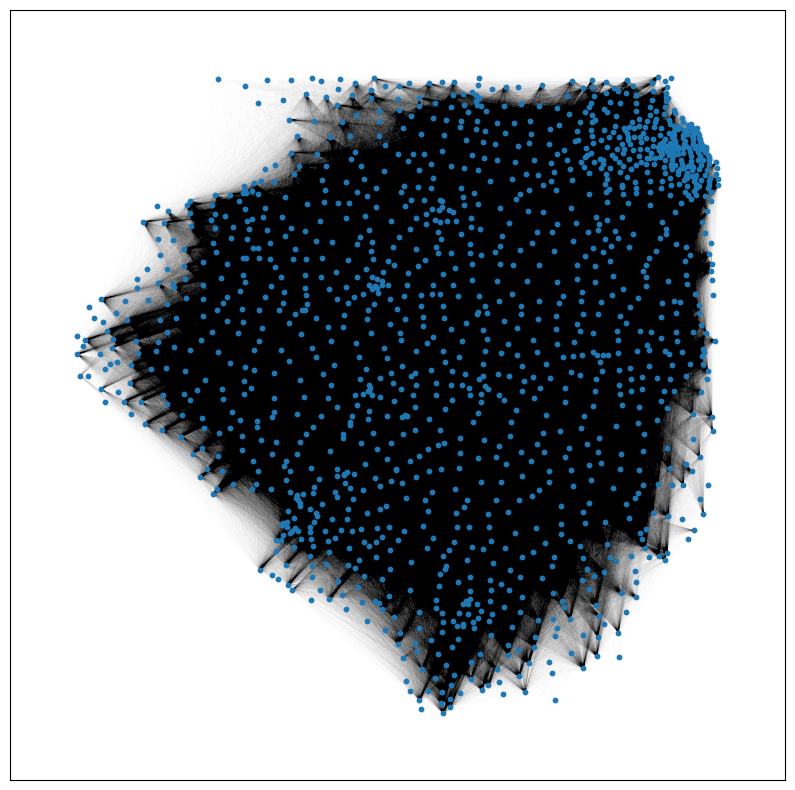

In [6]:
# Drawing the Network Graph
nx.draw_networkx(G,pos, with_labels=False, node_size=10, width=0.001) 
plt.savefig("../../Plots/Illinois_Graph.png", format="PNG")

## Spanning tree calculations

For the spanning tree, simply use networkx's ```minimum_spanning_tree``` functionality.

In [7]:
# Creating a Minimum Spanning Tree
T=nx.minimum_spanning_tree(G)

## Spanning tree visualization

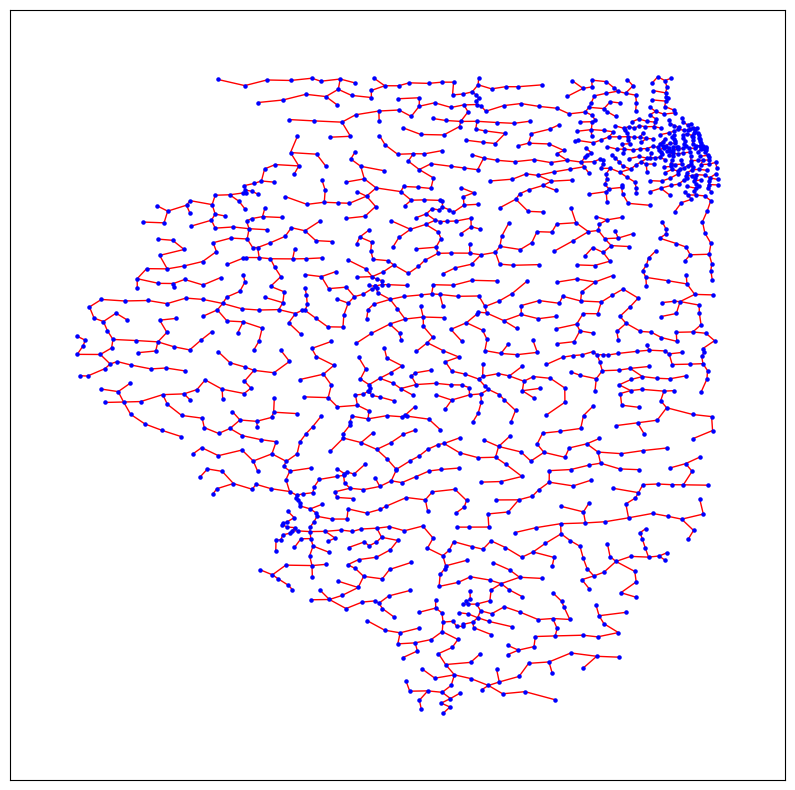

In [8]:
# Plotting the Minimum Spanning Tree
ered=[(i,j) for (i,j) in T.edges()] # selecting the edges in the tree (so that we can edit or show them in the plot)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(), node_color='b', node_size=5)
nx.draw_networkx_edges(G,pos,edgelist=ered, edge_color='r', width=1)
plt.savefig("../../Plots/Illinois_Spanning_Tree_Graph.png", format="PNG")

## Spanning tree above visualization

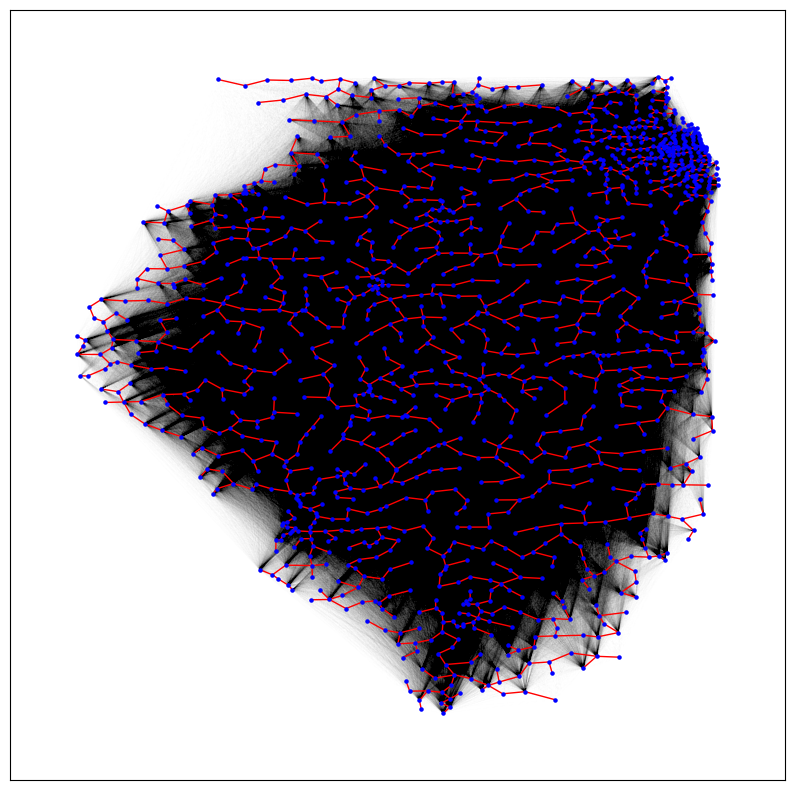

In [9]:
## Plotting all the edges (in red, the edges in the tree)
ered=[(i,j) for (i,j) in T.edges()] # selecting the edges in the tree
nx.draw_networkx_edges(G,pos,edgelist=G.edges(), edge_color='k', width=0.001) # showing all edges (in thinner lines)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(), node_color='b', node_size=5)
nx.draw_networkx_edges(G,pos,edgelist=ered, edge_color='r', width=1) # showing the tree edges (in red, and thicker lines)
fname="spanning_output.png"
plt.savefig("../../Plots/Illinois_Spanning_Tree_above_Graph.png", format="PNG")

## Cost output

Total, avg, min and max

In [10]:
# Analyzing the Spanning Tree Costs
totalCost=sum(d['weight'] for (i,j,d) in T.edges(data=True))
print(f"Total cost is: {totalCost}")
avgCost=sum(d['weight'] for (i,j,d) in T.edges(data=True))/T.number_of_edges()
print(f"Average cost is: {avgCost}")
minCost=min(d['weight'] for (i,j,d) in T.edges(data=True))
print(f"Min cost is: {minCost}")
maxCost=max(d['weight'] for (i,j,d) in T.edges(data=True))
print(f"Max cost is: {maxCost}")

Total cost is: 6627.612373898429
Average cost is: 4.750976612113569
Min cost is: 0.17945701529432845
Max cost is: 10.996622490865548
